In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)


In [ ]:
# Assume 'data_dir' is the directory containing gesture image folders
data_dir = '/content/leapGestRecog'

# Parameters
img_height, img_width = 128, 128
batch_size = 32

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')


Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [ ]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator
)


Epoch 1/25
500/500 [==============================] - 681s 1s/step - loss: 1.9192 - accuracy: 0.2895 - val_loss: 1.7587 - val_accuracy: 0.3225
Epoch 2/25
500/500 [==============================] - 692s 1s/step - loss: 1.4689 - accuracy: 0.4575 - val_loss: 1.3686 - val_accuracy: 0.5580
Epoch 3/25
500/500 [==============================] - 679s 1s/step - loss: 1.0696 - accuracy: 0.6001 - val_loss: 1.0367 - val_accuracy: 0.6633
Epoch 4/25
500/500 [==============================] - 689s 1s/step - loss: 0.8045 - accuracy: 0.7039 - val_loss: 0.7526 - val_accuracy: 0.7467
Epoch 5/25
500/500 [==============================] - 698s 1s/step - loss: 0.6194 - accuracy: 0.7708 - val_loss: 0.7307 - val_accuracy: 0.7595
Epoch 6/25
500/500 [==============================] - 675s 1s/step - loss: 0.5315 - accuracy: 0.8102 - val_loss: 0.5332 - val_accuracy: 0.8202
Epoch 7/25
500/500 [==============================] - 672s 1s/step - loss: 0.4535 - accuracy: 0.8341 - val_loss: 0.5942 - val_accuracy: 0.8000

In [ ]:
val_loss, val_acc = model.evaluate(validation_generator)
print(f'Validation accuracy: {val_acc}')


125/125 [==============================] - 64s 514ms/step - loss: 0.5021 - accuracy: 0.8558
Validation accuracy: 0.8557500243186951


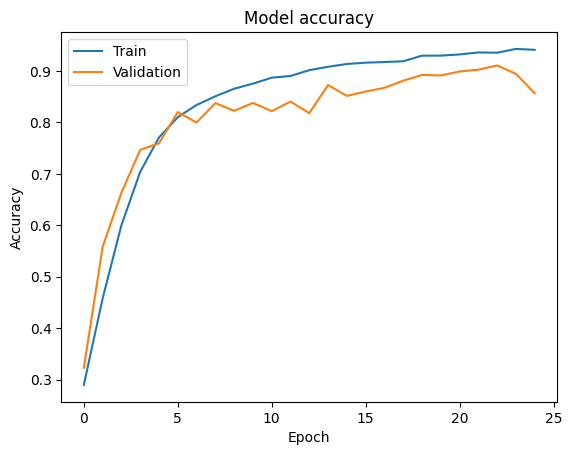

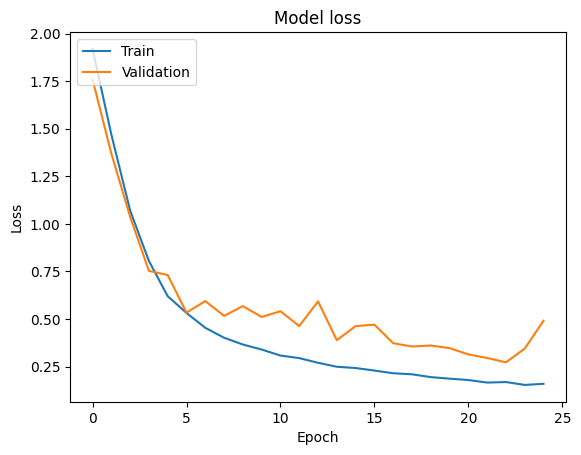

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
model.save('hand_gesture_model2.h5')